<a href="https://colab.research.google.com/github/MuhamadRonaAnggara/UAS_BDDM/blob/main/UAS_BDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load dataset
file_path = '/content/spotify_songs.csv'
spotify_data = pd.read_csv(file_path)

In [ ]:
# Handle missing values
spotify_data['track_name'].fillna('Unknown', inplace=True)
spotify_data['track_artist'].fillna('Unknown', inplace=True)
spotify_data['track_album_name'].fillna('Unknown', inplace=True)

<ipython-input-3-613bbeb951f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spotify_data['track_name'].fillna('Unknown', inplace=True)
<ipython-input-3-613bbeb951f6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

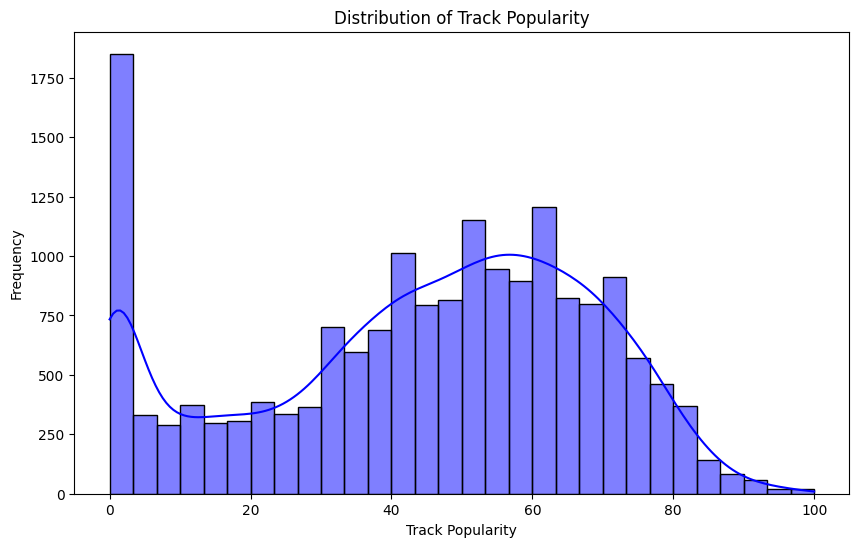

In [ ]:
# EDA - Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['track_popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Selection
label_encoder = LabelEncoder()
spotify_data['playlist_genre_encoded'] = label_encoder.fit_transform(spotify_data['playlist_genre'])

features = spotify_data[['danceability', 'energy', 'valence', 'loudness', 'tempo']]
target = spotify_data['playlist_genre_encoded']

In [ ]:
# Modeling
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy Score: 0.620473933649289
              precision    recall  f1-score   support

       latin       0.27      0.07      0.11       409
         pop       0.52      0.55      0.53      1640
         rap       0.70      0.72      0.71      1759
        rock       0.66      0.74      0.70      1467

    accuracy                           0.62      5275
   macro avg       0.54      0.52      0.51      5275
weighted avg       0.60      0.62      0.60      5275



In [ ]:
# Hyperparameter Optimization
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_y_pred = best_model.predict(X_test)

In [ ]:
# Re-evaluation after optimization
print("Optimized Accuracy Score:", accuracy_score(y_test, best_y_pred))
print(classification_report(y_test, best_y_pred, target_names=label_encoder.classes_))

# Save Model
import joblib
joblib.dump(best_model, '/content/spotify_songs.csv')

Optimized Accuracy Score: 0.6219905213270143
              precision    recall  f1-score   support

       latin       0.35      0.04      0.07       409
         pop       0.52      0.56      0.54      1640
         rap       0.69      0.72      0.70      1759
        rock       0.66      0.74      0.70      1467

    accuracy                           0.62      5275
   macro avg       0.56      0.51      0.50      5275
weighted avg       0.60      0.62      0.60      5275



['/content/spotify_songs.csv']

In [ ]:
# Save Model
import joblib
joblib.dump(best_model, '/content/spotify_songs.csv')

['/content/spotify_songs.csv']